In [1]:
# Fraud Detection  

In [2]:
# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset/synthetic_fraud_dirty_somalia.csv")

In [3]:
# the shape of the data 
df.shape

(5150, 10)

In [4]:
# first 10 rows
df.head(10)

,transaction_id,amount,customer_age,hour,transaction_type,merchant_category,card_type,country,device,is_fraud
0,TXN100000,56.31,68.0,23,purchase,grocery,credit,Somalia,mobile,0
1,TXN100001,361.21,57.0,4,transfer,NaN,credit,Somalia,web,0
2,TXN100002,158.01,24.0,8,transfer,travel,debit,Ethiopia,web,0
3,TXN100003,109.55,49.0,9,transfer,electronics,credit,Somalia,mobile,0
4,TXN100004,20.35,65.0,12,purchase,travel,credit,Somalia,mobile,0
5,TXN100005,20.35,36.0,14,transfer,travel,debit,Somalia,mobile,0
6,TXN100006,7.18,23.0,11,transfer,travel,credit,Ethiopia,mobile,0
7,TXN100007,241.35,37.0,4,cash_withdrawal,telecom,debit,Somalia,web,0
8,TXN100008,110.29,44.0,4,cash_withdrawal,travel,credit,Kenya,mobile,0
9,TXN100009,147.75,70.0,17,transfer,grocery,debit,Somalia,mobile,0


In [5]:
# Last 10 rows
df.tail(10)

,transaction_id,amount,customer_age,hour,transaction_type,merchant_category,card_type,country,device,is_fraud
5140,TXN102528,1.07,43.0,21,purchase,electronics,credit,Somalia,web,0
5141,TXN100405,271.05,41.0,14,transfer,telecom,debit,Kenya,web,0
5142,TXN101938,82.76,23.0,15,cash_withdrawal,travel,credit,Ethiopia,web,0
5143,TXN102633,21.92,58.0,11,cash_withdrawal,electronics,credit,Somalia,web,0
5144,TXN102643,123.99,38.0,20,transfer,grocery,debit,Ethiopia,web,0
5145,TXN101988,68.91,35.0,4,purchase,telecom,debit,Somalia,Web,0
5146,TXN102093,88.91,NaN,0,purchase,grocery,credit,Kenya,mobile,0
5147,TXN103128,363.12,32.0,15,transfer,travel,credit,Somalia,web,0
5148,TXN103587,172.48,54.0,3,transfer,electronics,debit,Kenya,mobile,0
5149,TXN103625,36.66,50.0,7,purchase,NaN,debit,Kenya,mobile,0


In [6]:
# Structural Inspection (CRITICAL)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     5150 non-null   object 
 1   amount             5150 non-null   float64
 2   customer_age       4544 non-null   float64
 3   hour               5150 non-null   int64  
 4   transaction_type   5150 non-null   object 
 5   merchant_category  4739 non-null   object 
 6   card_type          5150 non-null   object 
 7   country            5150 non-null   object 
 8   device             4931 non-null   object 
 9   is_fraud           5150 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 402.5+ KB


In [7]:
# Statistical Overview
df.describe(include="all")


,transaction_id,amount,customer_age,hour,transaction_type,merchant_category,card_type,country,device,is_fraud
count,5150,5150.000000,4544.000000,5150.000000,5150,4739,5150,5150,4931,5150
unique,5000,NaN,NaN,NaN,3,4,2,4,6,4
top,TXN101969,NaN,NaN,NaN,cash_withdrawal,telecom,credit,Somalia,web,0
freq,2,NaN,NaN,NaN,1750,1214,2576,2838,2215,4976
mean,NaN,319.406772,45.736356,11.660194,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1426.577342,16.963714,7.021640,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,5.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,35.072500,32.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,87.150000,45.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,175.990000,60.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# missing values
df.isna().mean().sort_values(ascending=False)


customer_age         0.117670
merchant_category    0.079806
device               0.042524
transaction_id       0.000000
amount               0.000000
hour                 0.000000
transaction_type     0.000000
card_type            0.000000
country              0.000000
is_fraud             0.000000
dtype: float64

In [9]:
# Duplicate Detection
df.duplicated().sum()
df["transaction_id"].duplicated().sum()


np.int64(150)

In [10]:
 # Categorical Health Check
for col in ["device", "country", "transaction_type"]:
    print(df[col].value_counts(dropna=False), "\n")


device
web        2215
mobile     2196
NaN         219
Mobile      141
Web         134
mobile      124
WEB         121
Name: count, dtype: int64 

country
Somalia     2838
Kenya       1276
Ethiopia     776
Djibouti     260
Name: count, dtype: int64 

transaction_type
cash_withdrawal    1750
transfer           1727
purchase           1673
Name: count, dtype: int64 



In [11]:
# Force Numeric Columns
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df["customer_age"] = pd.to_numeric(df["customer_age"], errors="coerce")
df["hour"] = pd.to_numeric(df["hour"], errors="coerce")


# output
# "120.50" → 120.5
# "abc" → NaN
# "26" → 26

In [12]:
# Normalize Target Column
df["is_fraud"] = (
    df["is_fraud"]
    .replace({"yes": 1, "no": 0})
)

df["is_fraud"] = pd.to_numeric(df["is_fraud"], errors="coerce")

# output
# "yes" → 1
# "no" → 0
# Anything else → NaN


In [13]:
# Convert Integers to Nullable Int
df["customer_age"] = df["customer_age"].astype("Int64")
df["hour"] = df["hour"].astype("Int64")
df["is_fraud"] = df["is_fraud"].astype("Int64")


In [14]:
# Normalize String Columns
string_cols = [
    "transaction_id",
    "transaction_type",
    "merchant_category",
    "card_type",
    "country",
    "device"
]

for col in string_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace("nan", np.nan)
    )


In [15]:
# Convert Categoricals

categorical_cols = [
    "transaction_type",
    "merchant_category",
    "card_type",
    "country",
    "device"
]

for col in categorical_cols:
    df[col] = df[col].astype("category")


In [16]:
df.info()
df.head(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   transaction_id     5150 non-null   object  
 1   amount             5150 non-null   float64 
 2   customer_age       4544 non-null   Int64   
 3   hour               5150 non-null   Int64   
 4   transaction_type   5150 non-null   category
 5   merchant_category  4739 non-null   category
 6   card_type          5150 non-null   category
 7   country            5150 non-null   category
 8   device             4931 non-null   category
 9   is_fraud           5150 non-null   Int64   
dtypes: Int64(3), category(5), float64(1), object(1)
memory usage: 242.3+ KB


,transaction_id,amount,customer_age,hour,transaction_type,merchant_category,card_type,country,device,is_fraud
0,txn100000,56.310000,68,23,purchase,grocery,credit,somalia,mobile,0
1,txn100001,361.210000,57,4,transfer,NaN,credit,somalia,web,0
2,txn100002,158.010000,24,8,transfer,travel,debit,ethiopia,web,0
3,txn100003,109.550000,49,9,transfer,electronics,credit,somalia,mobile,0
4,txn100004,20.350000,65,12,purchase,travel,credit,somalia,mobile,0
5,txn100005,20.350000,36,14,transfer,travel,debit,somalia,mobile,0
6,txn100006,7.180000,23,11,transfer,travel,credit,ethiopia,mobile,0
7,txn100007,241.350000,37,4,cash_withdrawal,telecom,debit,somalia,web,0
8,txn100008,110.290000,44,4,cash_withdrawal,travel,credit,kenya,mobile,0
9,txn100009,147.750000,70,17,transfer,grocery,debit,somalia,mobile,0


In [17]:
# Deduplication

In [18]:
exact_dupes = df.duplicated()
exact_dupes.sum()


np.int64(150)

In [19]:
# Remove duplicates
df = df.drop_duplicates()


In [20]:
# Detect Logical Duplicates
df["transaction_id"].duplicated().sum()


np.int64(0)

In [21]:
# Inspect Logical Duplicates
dupe_ids = df.loc[df["transaction_id"].duplicated(), "transaction_id"].unique()

df[df["transaction_id"].isin(dupe_ids)].sort_values("transaction_id")


,transaction_id,amount,customer_age,hour,transaction_type,merchant_category,card_type,country,device,is_fraud


In [22]:
# Apply Logical Deduplication
df = df.sort_index()
df = df.drop_duplicates(subset="transaction_id", keep="first")


In [23]:
# Validate Deduplication
df.shape
df["transaction_id"].duplicated().sum()


np.int64(0)

In [24]:
df.shape

(5000, 10)

In [25]:
# Categorical Normalization

In [26]:
# Define Allowed Values
VALID_TRANSACTION_TYPES = {"purchase", "transfer", "cash_withdrawal"}
VALID_MERCHANT_CATEGORIES = {"grocery", "telecom", "travel", "electronics"}
VALID_CARD_TYPES = {"debit", "credit"}
VALID_COUNTRIES = {"somalia", "kenya", "ethiopia", "djibouti"}
VALID_DEVICES = {"mobile", "web"}


In [27]:
def audit_categories(df, col, valid_set):
    observed = set(df[col].dropna().unique())
    invalid = observed - valid_set
    return observed, invalid


In [28]:
# column and value matching 
for col, valid in {
    "transaction_type": VALID_TRANSACTION_TYPES,
    "merchant_category": VALID_MERCHANT_CATEGORIES,
    "card_type": VALID_CARD_TYPES,
    "country": VALID_COUNTRIES,
    "device": VALID_DEVICES,
}.items():
    observed, invalid = audit_categories(df, col, valid)
    print(col, "invalid:", invalid)


transaction_type invalid: set()
merchant_category invalid: set()
card_type invalid: set()
country invalid: set()
device invalid: set()


In [29]:
# Enforce Categories
def enforce_categories(df, col, valid_set):
    df[col] = df[col].where(df[col].isin(valid_set), pd.NA)
    return df

for col, valid in {
    "transaction_type": VALID_TRANSACTION_TYPES,
    "merchant_category": VALID_MERCHANT_CATEGORIES,
    "card_type": VALID_CARD_TYPES,
    "country": VALID_COUNTRIES,
    "device": VALID_DEVICES,
}.items():
    df = enforce_categories(df, col, valid)


In [30]:
# Re-Declare Categories
df["transaction_type"] = df["transaction_type"].astype(
    pd.CategoricalDtype(categories=list(VALID_TRANSACTION_TYPES))
)

df["merchant_category"] = df["merchant_category"].astype(
    pd.CategoricalDtype(categories=list(VALID_MERCHANT_CATEGORIES))
)

df["card_type"] = df["card_type"].astype(
    pd.CategoricalDtype(categories=list(VALID_CARD_TYPES))
)

df["country"] = df["country"].astype(
    pd.CategoricalDtype(categories=list(VALID_COUNTRIES))
)

df["device"] = df["device"].astype(
    pd.CategoricalDtype(categories=list(VALID_DEVICES))
)


In [31]:
# validate
for col in [
    "transaction_type",
    "merchant_category",
    "card_type",
    "country",
    "device"
]:
    print(col, df[col].value_counts(dropna=False), "\n")


transaction_type transaction_type
cash_withdrawal    1690
transfer           1681
purchase           1629
Name: count, dtype: int64 

merchant_category merchant_category
telecom        1184
electronics    1152
grocery        1132
travel         1132
NaN             400
Name: count, dtype: int64 

card_type card_type
credit    2504
debit     2496
Name: count, dtype: int64 

country country
somalia     2753
kenya       1235
ethiopia     758
djibouti     254
Name: count, dtype: int64 

device device
web       2401
mobile    2389
NaN        210
Name: count, dtype: int64 



In [32]:
# Outlier customer age and hour

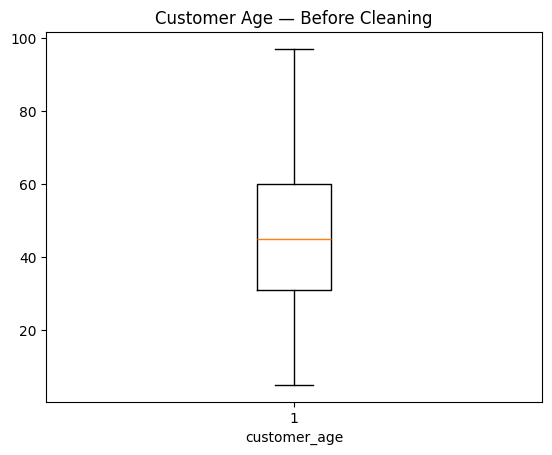

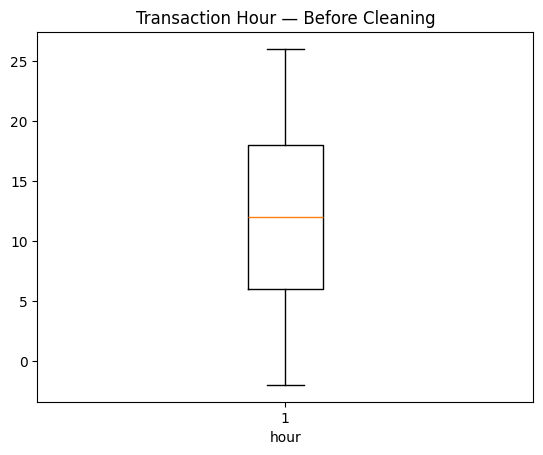

In [33]:
# BEFORE cleaning
plt.figure()
plt.boxplot(df["customer_age"].dropna())
plt.title("Customer Age — Before Cleaning")
plt.xlabel("customer_age")
plt.show()

plt.figure()
plt.boxplot(df["hour"].dropna())
plt.title("Transaction Hour — Before Cleaning")
plt.xlabel("hour")
plt.show()

In [34]:
# cleaning outlier
# Business rule enforcement (Step 5)

# customer_age must be between 18 and 90
df.loc[
    (df["customer_age"] < 18) | (df["customer_age"] > 90),
    "customer_age"
] = pd.NA

# hour must be between 0 and 23
df.loc[
    (df["hour"] < 0) | (df["hour"] > 23),
    "hour"
] = pd.NA


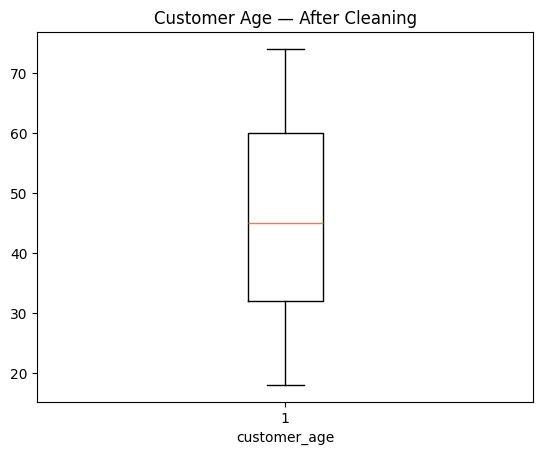

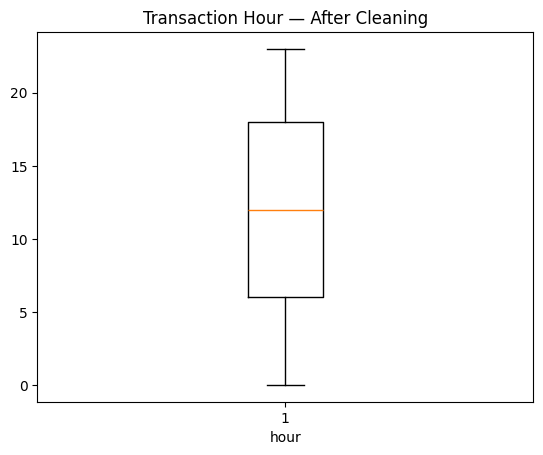

In [35]:
# AFTER cleaning
plt.figure()
plt.boxplot(df["customer_age"].dropna())
plt.title("Customer Age — After Cleaning")
plt.xlabel("customer_age")
plt.show()

plt.figure()
plt.boxplot(df["hour"].dropna())
plt.title("Transaction Hour — After Cleaning")
plt.xlabel("hour")
plt.show()


In [36]:
# Missing Value Treatment


In [37]:
df.isna().sum()


transaction_id         0
amount                 0
customer_age         644
hour                  50
transaction_type       0
merchant_category    400
card_type              0
country                0
device               210
is_fraud               0
dtype: int64

In [38]:
# Impute customer_age with median
age_median = df["customer_age"].median()
df["customer_age"] = df["customer_age"].fillna(age_median)

# Impute hour with mode
hour_mode = df["hour"].mode()[0]
df["hour"] = df["hour"].fillna(hour_mode)


In [39]:
for col in ["merchant_category", "device"]:
    df[col] = df[col].cat.add_categories("unknown")
    df[col] = df[col].fillna("unknown")


In [40]:
df.isna().sum()


transaction_id       0
amount               0
customer_age         0
hour                 0
transaction_type     0
merchant_category    0
card_type            0
country              0
device               0
is_fraud             0
dtype: int64

In [41]:
# Define Target & Feature Split


In [42]:
y = df["is_fraud"]
X = df.drop(columns=["is_fraud"])


In [43]:
# Log-transform amount


In [44]:
X["amount_log"] = np.log1p(X["amount"])


In [45]:
# Night transaction flag
X["is_night"] = X["hour"].between(0, 5).astype(int)


In [46]:
# Age bucket
X["age_bucket"] = pd.cut(
    X["customer_age"],
    bins=[18, 30, 45, 60, 90],
    labels=["18-30", "31-45", "46-60", "60+"]
)


In [47]:
# Geographic Feature
X["is_cross_border"] = (X["country"] != "somalia").astype(int)


In [48]:
X["is_web"] = (X["device"] == "web").astype(int)


In [49]:
# Select categoricals to encode

In [50]:
categorical_cols = [
    "transaction_type",
    "merchant_category",
    "card_type",
    "age_bucket"
]


In [51]:
# One-hot encode
X = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [52]:
# Drop Raw Columns No Longer Needed
X = X.drop(columns=[
    "transaction_id",
    "amount",
    "customer_age",
    "hour",
    "device",
    "country"
])


In [53]:
X.info()
X.head()


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   amount_log                 5000 non-null   float64
 1   is_night                   5000 non-null   int64  
 2   is_cross_border            5000 non-null   int64  
 3   is_web                     5000 non-null   int64  
 4   transaction_type_purchase  5000 non-null   bool   
 5   transaction_type_transfer  5000 non-null   bool   
 6   merchant_category_grocery  5000 non-null   bool   
 7   merchant_category_telecom  5000 non-null   bool   
 8   merchant_category_travel   5000 non-null   bool   
 9   merchant_category_unknown  5000 non-null   bool   
 10  card_type_debit            5000 non-null   bool   
 11  age_bucket_31-45           5000 non-null   bool   
 12  age_bucket_46-60           5000 non-null   bool   
 13  age_bucket_60+             5000 non-null   bool   
dt

,amount_log,is_night,is_cross_border,is_web,transaction_type_purchase,transaction_type_transfer,merchant_category_grocery,merchant_category_telecom,merchant_category_travel,merchant_category_unknown,card_type_debit,age_bucket_31-45,age_bucket_46-60,age_bucket_60+
0,4.048475,0,0,0,True,False,True,False,False,False,False,False,False,True
1,5.892224,1,0,1,False,True,False,False,False,True,False,False,True,False
2,5.068967,0,1,1,False,True,False,False,True,False,True,False,False,False
3,4.705468,0,0,0,False,True,False,False,False,False,False,False,True,False
4,3.061052,0,0,0,True,False,False,False,True,False,False,False,False,True


In [54]:
df

,transaction_id,amount,customer_age,hour,transaction_type,merchant_category,card_type,country,device,is_fraud
0,txn100000,56.31,68,23,purchase,grocery,credit,somalia,mobile,0
1,txn100001,361.21,57,4,transfer,unknown,credit,somalia,web,0
2,txn100002,158.01,24,8,transfer,travel,debit,ethiopia,web,0
3,txn100003,109.55,49,9,transfer,electronics,credit,somalia,mobile,0
4,txn100004,20.35,65,12,purchase,travel,credit,somalia,mobile,0
...,...,...,...,...,...,...,...,...,...,...
4995,txn104995,273.23,74,20,cash_withdrawal,electronics,debit,somalia,mobile,0
4996,txn104996,15.26,61,10,cash_withdrawal,telecom,debit,somalia,web,0
4997,txn104997,47.67,40,20,cash_withdrawal,travel,debit,ethiopia,mobile,0
4998,txn104998,202.97,50,5,transfer,travel,debit,somalia,web,0


In [55]:
import numpy as np
import pandas as pd

def transform_input(payload: dict) -> pd.DataFrame:
    df = pd.DataFrame([payload])

    # ---------- Numeric ----------
    df["amount_log"] = np.log1p(df["amount"])
    df["is_night"] = df["hour"].between(0, 5).astype(int)
    df["is_cross_border"] = (df["country"] != "somalia").astype(int)
    df["is_web"] = (df["device"] == "web").astype(int)

    # ---------- Age bucket ----------
    df["age_bucket"] = pd.cut(
        df["customer_age"],
        bins=[18, 30, 45, 60, 90],
        labels=["18-30", "31-45", "46-60", "60+"]
    )

    # ---------- One-hot encoding ----------
    categorical_cols = [
        "transaction_type",
        "merchant_category",
        "card_type",
        "age_bucket"
    ]

    df = pd.get_dummies(df, columns=categorical_cols)

    # ---------- Ensure ALL model columns exist ----------
    MODEL_COLUMNS = [
        "amount_log", "is_night", "is_cross_border", "is_web",
        "transaction_type_purchase", "transaction_type_transfer",
        "merchant_category_grocery", "merchant_category_telecom",
        "merchant_category_travel", "merchant_category_unknown",
        "card_type_debit",
        "age_bucket_31-45", "age_bucket_46-60", "age_bucket_60+"
    ]

    for col in MODEL_COLUMNS:
        if col not in df:
            df[col] = 0

    return df[MODEL_COLUMNS]

    transformer.py



In [56]:
import os
os.listdir()

['notebook.ipynb',
 'transformer.py',
 '.ipynb_checkpoints',
 'notebook-v-1.ipynb']

In [57]:
import os
os.getcwd()


'/Users/kooshin/Desktop/Fruad-detection/notebook'

In [58]:
from transformer import transform_input

sample_payload = {
    "amount": 120.5,
    "customer_age": 32,
    "hour": 3,
    "transaction_type": "transfer",
    "merchant_category": "telecom",
    "card_type": "debit",
    "country": "kenya",
    "device": "web"
}

X_test = transform_input(sample_payload)
print(X_test)
print(X_test.shape)


   amount_log  is_night  is_cross_border  is_web  transaction_type_purchase  \
0    4.799914         1                1       1                          0   

   transaction_type_transfer  merchant_category_grocery  \
0                       True                          0   

   merchant_category_telecom  merchant_category_travel  \
0                       True                         0   

   merchant_category_unknown  card_type_debit  age_bucket_31-45  \
0                          0             True              True   

   age_bucket_46-60  age_bucket_60+  
0             False           False  
(1, 14)


In [59]:
# prepare X & Y 

# Features
X = X.copy()

# Target
y = y.copy()


In [60]:
y.value_counts(normalize=True)


is_fraud
0    0.9758
1    0.0242
Name: proportion, dtype: Float64

In [61]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
y.value_counts()
y.value_counts(normalize=True)


is_fraud
0    0.9758
1    0.0242
Name: proportion, dtype: Float64

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))
confusion_matrix(y_val, y_pred)


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       976
         1.0       1.00      0.04      0.08        24

    accuracy                           0.98      1000
   macro avg       0.99      0.52      0.53      1000
weighted avg       0.98      0.98      0.97      1000



array([[976,   0],
       [ 23,   1]])

In [74]:
y_proba = model.predict_proba(X_val)[:, 1]


In [80]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.05   # 🔥 lower threshold to catch more fraud

y_pred_custom = (y_proba >= threshold).astype(int)

print(classification_report(y_val, y_pred_custom))
confusion_matrix(y_val, y_pred_custom)


              precision    recall  f1-score   support

         0.0       0.99      0.36      0.53       976
         1.0       0.03      0.79      0.06        24

    accuracy                           0.37      1000
   macro avg       0.51      0.58      0.29      1000
weighted avg       0.96      0.37      0.52      1000



array([[355, 621],
       [  5,  19]])

In [81]:
for t in [0.03, 0.05, 0.1, 0.2]:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_val, y_pred_t))



Threshold = 0.03
              precision    recall  f1-score   support

         0.0       0.98      0.17      0.28       976
         1.0       0.03      0.88      0.05        24

    accuracy                           0.18      1000
   macro avg       0.50      0.52      0.17      1000
weighted avg       0.96      0.18      0.28      1000


Threshold = 0.05
              precision    recall  f1-score   support

         0.0       0.99      0.36      0.53       976
         1.0       0.03      0.79      0.06        24

    accuracy                           0.37      1000
   macro avg       0.51      0.58      0.29      1000
weighted avg       0.96      0.37      0.52      1000


Threshold = 0.1
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.83       976
         1.0       0.05      0.58      0.09        24

    accuracy                           0.71      1000
   macro avg       0.52      0.65      0.46      1000
weighted avg       0.

In [82]:
FRAUD_THRESHOLD = 0.05

y_pred_final = (y_proba >= FRAUD_THRESHOLD).astype(int)


In [83]:
import joblib

joblib.dump(
    {
        "model": model,
        "threshold": 0.05
    },
    "fraud_model_rf_high_recall.pkl"
)


['fraud_model_rf_high_recall.pkl']